```{include} ../math-definitions.md
```

In [1]:
from bccr import SW
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd

# Representación gráfica de series de tiempo



(subsec-nivel-serie)=
## Nivel de la serie

Antes de modelar una serie de tiempo, es útil representarla con un gráfico para detectar algunas de sus propiedades.

En este caso: el PIB
- muestra una tendencia positiva
- tiene variaciones estacionarias


```{margin} Otras implementaciones
Las operaciones acá descritas las podemos hacer también con {ref}`R<Rcode-transform>`
```
En lo que sigue, nos referimos a esta serie en nivel como $y_t$.

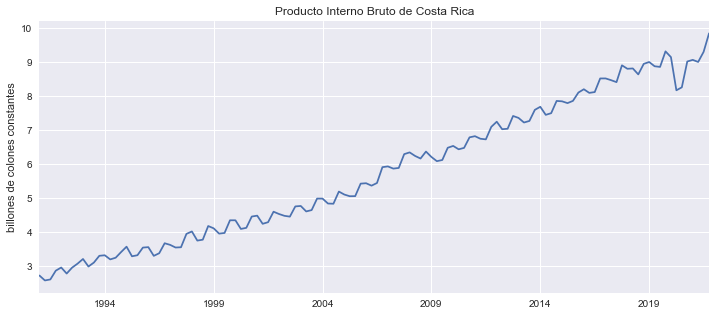

In [2]:
def figura(datos, titulo, y):
    fig, ax = plt.subplots(figsize=(12,5))
    ax = datos.plot(ax=ax, legend=None)
    ax.set(title=titulo, xlabel=" ", ylabel=y)
    return fig

pib = SW(PIB=86765)
pib /=1e6

figura(pib,
       'Producto Interno Bruto de Costa Rica',
       'billones de colones constantes');

## Primera diferencia de la serie
\begin{equation*}
\Delta y_t \equiv y_t - y_{t-1}
\end{equation*}
Esta transformación

*  elimina la tendencia de la serie,
*  mantiene las oscilaciones estacionales.

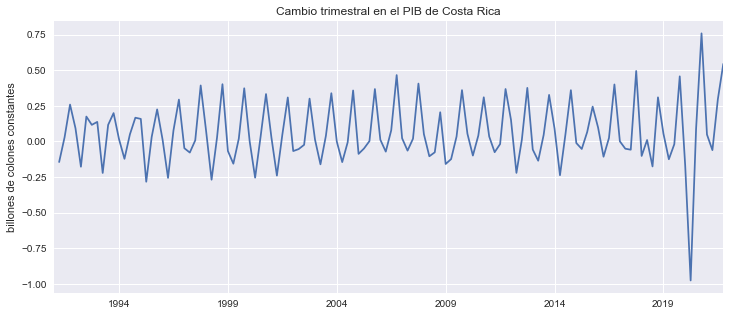

In [3]:
figura(pib.diff(1),
       'Cambio trimestral en el PIB de Costa Rica',
       'billones de colones constantes');

## Tasa de crecimiento de la serie
\begin{equation*}
\Delta\% y_t \equiv \frac{y_t - y_{t-1}}{y_{t-1}} \times 100
\end{equation*}

*  Elimina tendencia, mantiene estacionalidad.
*  Limitación: asimetría con respecto a cambios positivos y negativos: Subir de 100 a 125 (aumento de 25%), bajar de 125 a 100 (caída de “solo” 20%).

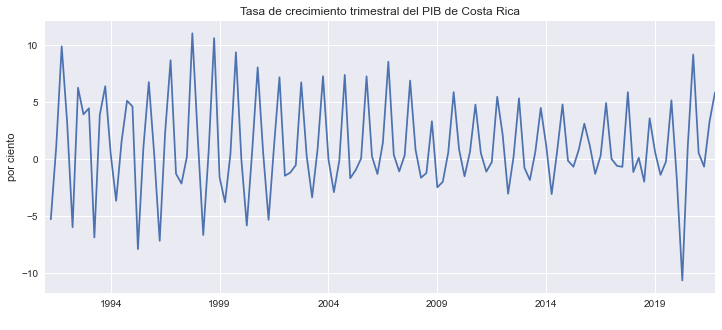

In [4]:
figura(100*pib.pct_change(1),
       'Tasa de crecimiento trimestral del PIB de Costa Rica',
       'por ciento');

## Tasa “continua” de crecimiento de la serie
\begin{equation*}
\Delta\% y_t \approx \left(\ln y_t - \ln y_{t-1}\right)\times 100
\end{equation*}

*  Similar a la anterior porque $\ln(1+x)\approx x$ si $x$ es “pequeño”
*  Ventaja: simetría con respecto a cambios positivos y negativos

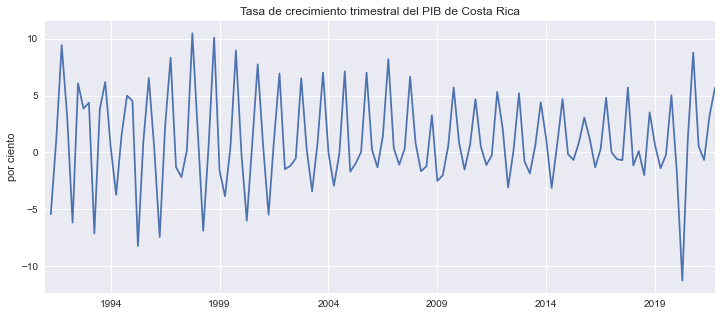

In [5]:
figura(100*np.log(pib).diff(),
       'Tasa de crecimiento trimestral del PIB de Costa Rica',
       'por ciento');

## Diferencia interanual de la serie
\begin{equation*}
\Delta_4 y_t \equiv y_t - y_{t-4}
\end{equation*}

*  Elimina tanto la tendencia como el componente estacional
*  Nótese la fuerte disminución del PIB durante la crisis de 2008.

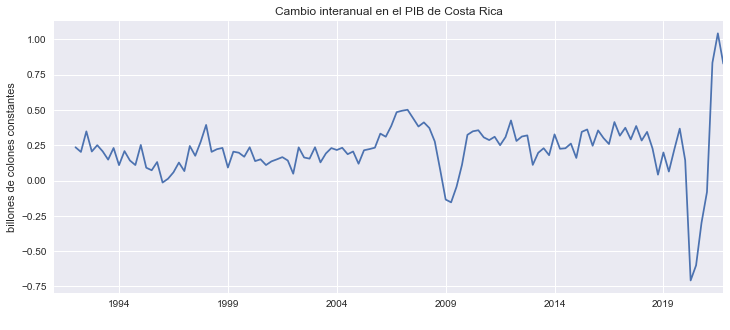

In [6]:
figura(pib.diff(4),
       'Cambio interanual en el PIB de Costa Rica',
       'billones de colones constantes');

## Tasa de crecimiento interanual
\begin{equation*}
\Delta_4\% y_t \approx \left(\ln y_t - \ln y_{t-4}\right)\times 100
\end{equation*}


*  Equivalente a la suma de las tasas de crecimiento de los cuatro trimestres comprendidos en el año:


\begin{align*}
\Delta_4\% y_t &\approx \left(\ln y_t - \ln y_{t-4}\right)\times 100 \\
  &= \left(\ln y_{t} - \ln y_{t-1} + \ln y_{t-1} - \ln y_{t-2} + \ln y_{t-2} - \ln y_{t-3} + \ln y_{t-3} - \ln y_{t-4}\right)\times 100 \\
  &= \Delta\% y_{t} + \Delta\% y_{t-1} + \Delta\% y_{t-2} + \Delta\% y_{t-3}
\end{align*}

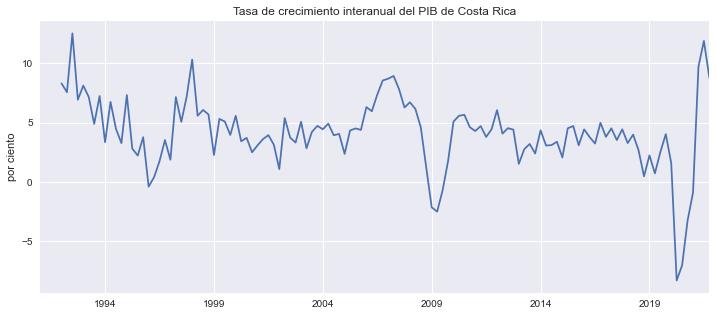

In [7]:
figura(100*np.log(pib).diff(4),
       'Tasa de crecimiento interanual del PIB de Costa Rica',
       'por ciento');

## Serie suavizada por media móvil
\begin{equation*}
y^s_t \equiv \tfrac{1}{4}\left(y_t + y_{t-1} + y_{t-2} + y_{t-3}\right)
\end{equation*}

*  Elimina el componente estacional, pero manteniendo la tendencia
*  Se observa un cambio estructural en 2008-2009.

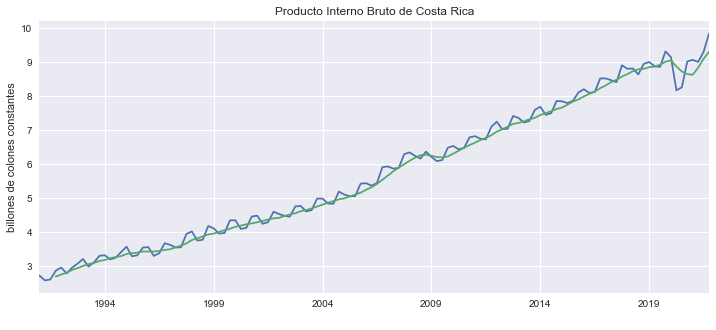

In [8]:
pib2 = pd.concat([pib, pib.rolling(4).mean()], axis=1)
pib2.columns = ['Serie original', 'Serie suavizada']

figura(pib2,
    'Producto Interno Bruto de Costa Rica',
    'billones de colones constantes');

{{ empieza_ejemplo }} Transformación de datos{{ fin_titulo_ejemplo }}
Las transformaciones ilustradas en las figuras pueden ser calculadas con Stata y con Python:


|	Operacion                      | Stata                              | Python                |
|  :---------------------------  | :--------------------------------- | :-------------------- |
|	Serie original                 | pib                                | pib                   |
|	Primera diferencia             | D.pib                              | pib.diff()            |
|	Tasa de crecimiento            | D.pib / L.pib                      | pib.pct_change(1)     |
|	Tasa de variación continua     | gen l=log(pib)                     | np.log(pib).diff()    |
|	                               | D.lpib                             |                       |
|	Diferencia interanual          | S4.pib                             | pib.diff(4)           |
|	Tasa de crecimiento interanual | S4.lpib                            | np.log(pib).diff(4)   |
|	Suavizada por media móvil      | tssmooth ma y = pib, window(3 1 0) | pib.rolling(4).mean() |
{{ termina_ejemplo }}